> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> Relevent data to be used in the following analysis include the following varibales:
    id                                       
    popularity           
    budget               
    revenue    
    original_title                                              
    director                              
    runtime                 
    genres                  
    release_date           
    vote_count                       
    release_year              



### Question(s) for Analysis
> In this report, I explore the following questions:
    - What is the longest and the shortest movie?
    - Which movie is the most popular?
    - Who is the director has the most number of movies?
    - How the vote counts changed over the years?


In [48]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [8]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [49]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')

In [50]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
df.shape

(10866, 21)

In [52]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03b96d7a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03ba9f5d30>]], dtype=object)

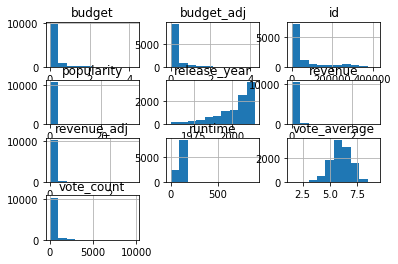

In [54]:
df.hist()

In [55]:
#drop some columns that are not useful in analysis 
df.drop (['imdb_id', 'production_companies', 'keywords', 'tagline','overview','homepage', 'cast'],axis=1 ,inplace= True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [57]:
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 14 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB



### Data Cleaning
> I made the following changes:
    - drop some columns that are not useful in my analysis
    - drop a few rows which contain a null values
 

In [59]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> I'll explore the following questions:
    - What is the longest and the shortest movie?
    - Which movie is the most popular?
    - Who is the director has the most number of movies?
    - find the colleration between data
    - How the vote counts changed over the years?




### Research Question 1  (what is the longest and the shortest movie? )

In [60]:
#return a movie that has maximum runtime
longest_movie=df.original_title[df.runtime==df.runtime.max()]
longest_movie


3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

In [61]:
#print how much time for the longest movie
movie_time= df.runtime[df.runtime==df.runtime.max()]
movie_time

3894    900
Name: runtime, dtype: int64

In [62]:
df.original_title[df.runtime==df.runtime.min()]

92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040            The Vatican Exorcisms
6383         The 12 Dogs of Christmas
6552                  Quatre Ã©toiles
6934        

In [63]:
#print how much time for the shortest movie
df.runtime[df.runtime==df.runtime.min()]

92      0
334     0
410     0
445     0
486     0
595     0
616     0
1289    0
1293    0
1849    0
3329    0
3794    0
3857    0
3884    0
4063    0
4138    0
4829    0
4944    0
5216    0
5695    0
5920    0
5938    0
5992    0
6040    0
6383    0
6552    0
6934    0
8874    0
Name: runtime, dtype: int64

In [64]:
def minutes_to_seconds(minutes):
    return minutes*60

In [65]:
minutes_to_seconds(movie_time)

3894    54000
Name: runtime, dtype: int64

### Research Question 2  (Which movie is the most popular ? )

In [66]:
#return the most popular movie
df.original_title[df.popularity==df.popularity.max()]


0    Jurassic World
Name: original_title, dtype: object

In [67]:
# print its runtime
df.popularity[df.popularity==df.popularity.max()]


0    32.985763
Name: popularity, dtype: float64

In [68]:
df.original_title[df.popularity==df.popularity.min()]


9977    The Hospital
Name: original_title, dtype: object

In [69]:
df.popularity[df.popularity==df.popularity.min()]


9977    0.000188
Name: popularity, dtype: float64

In [70]:
# 10 movies that are most popular 
d=df[['original_title','popularity']].sort_values('popularity', ascending=False).head(10)

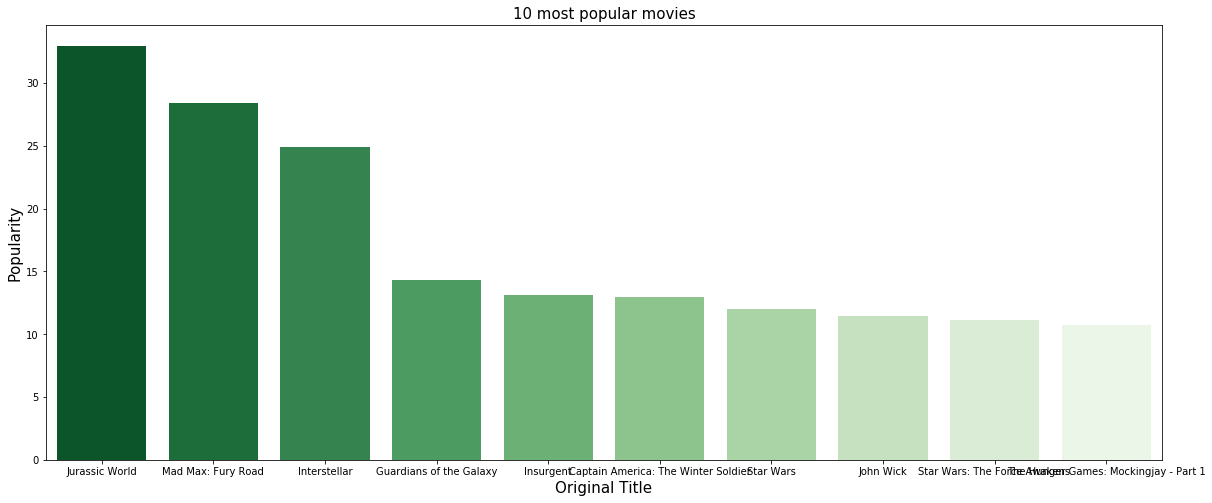

In [71]:
#figure the top 10
plt.figure(figsize=(20,8))
sns.barplot(x='original_title',y='popularity',data=d,palette='Greens_r')
plt.xlabel('Original Title',fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.title('10 most popular movies',fontsize=15)
plt.show()

In [72]:
# These are the top 10 movies are most popular

### Research Question 3  (Who is the director has the most number of movies? )

In [73]:
top_dir=df['director'].value_counts().head(15)

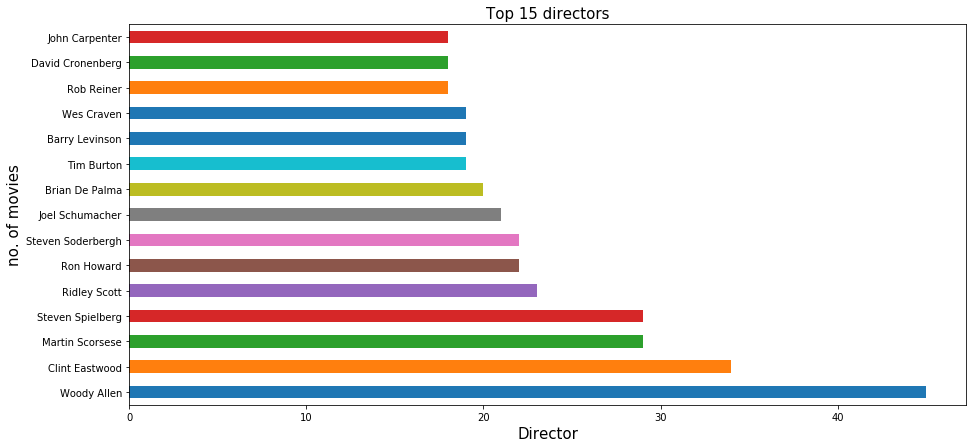

In [74]:
#figure the top 15 directors have most no. of movies
plt.figure(figsize=(15,7))

df['director'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Director',fontsize=15)
plt.ylabel('no. of movies',fontsize=15)
plt.title('Top 15 directors',fontsize=15)
plt.show()

In [75]:
# These are the top 15 directors with most no. of movies

In [76]:
#print number of movies that directed by woody Allen 
df['director'][df['director']=='Woody Allen'].count()

45

### Research Question 4  (How the vote counts changed over the year ? )

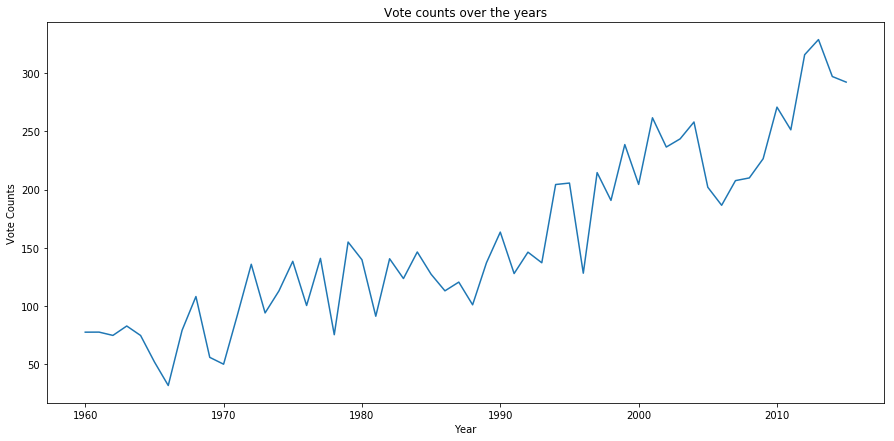

In [77]:
plt.figure(figsize=(15,7))
d= df.groupby('release_year')['vote_count'].mean().plot(kind='line')
#x= sns.lineplot(d.index,d)
plt.xlabel('Year')
plt.ylabel('Vote Counts')
plt.title('Vote counts over the years')
plt.show()

In [78]:
# from the above graph we can say that movies of recent years recevies more votes. the vote counts have increased over the years

In [79]:
#Create a new column named profit
df['profit']=df['revenue']-df['budget']

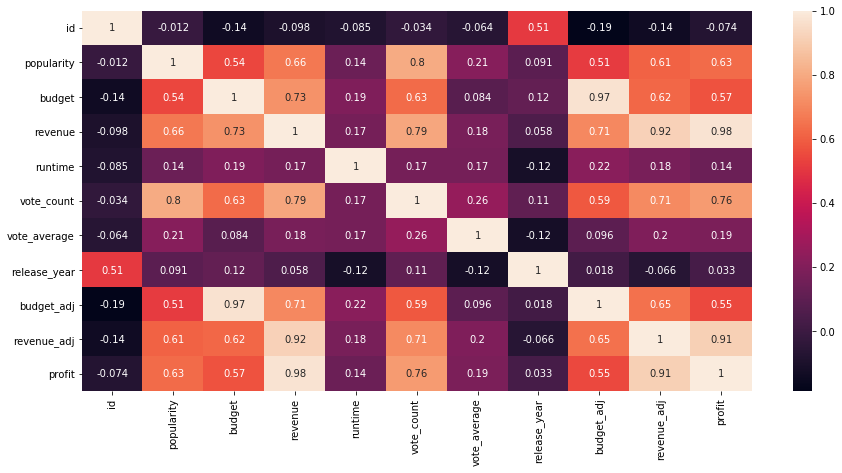

In [80]:
plt.figure(figsize=(15,7))
cor=df.corr()
cor
sns.heatmap(cor,annot=True)
#from this heatmap we can say that there are many attributes that have high positive correlation with one another, 
#that tells us how they are dependent on each other 

<a id='conclusions'></a>
## Conclusions
- The Longest movie is 'The story of film: An Odyssey' its runtime is 900 minutes. The number of shorest movies are 28 with runtime 0 minutes 
- Woody Allen is the director with the highest number of movies. he has directed 45 movies.
- Jurassic World is the most popular movie with percentage 32.985763
- The movies of recent years receive more votes. the vote counts have increased over the years
- from the above heatmap we can say that there are many attributes that have high positive correlation with one another, that tells us how they are dependent on each other:

    -popularity has high positive correlation with vote counts, that indicates a popular movie is likely to get more votes from fans, popularity also has high positive correlation with profit as well, indicating the more popularity a movie gains the more money.
    
    -budget has the highest correlation with revenue, that indicates when a movie's budget is high it gains the most money.
    
    -profit has high correlation with vote counts, which means if a movie receives a high number of votes it results in the movie profit.

### Limitations
> there are na values in director and genres columns which leads me to drop rows with na
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0